Poisson Noise :

In [56]:
# libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 

In [57]:
# orginal image
img = cv2.imread('currency.jpg',0)
cv2_imshow(img) 

In [58]:
poisson_noise = np.sqrt(img) * np.random.normal(0, 1, img.shape)

# Add the noise to the mu values
noisy_image = img + poisson_noise
cv2.imwrite('impulse.jpg',noisy_image)

True

Frequency Domain Filters :

In [59]:

# original image
f = cv2.imread('impulse.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

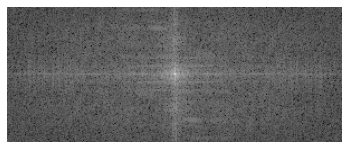

In [60]:
# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)), 
           cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)), 
           cmap='gray')
plt.axis('off')
plt.show()


In [61]:
# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 80
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

ILPF :

In [62]:

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

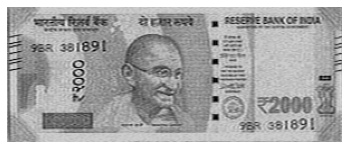

In [63]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

In [64]:
# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()


IHPF :

In [65]:

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

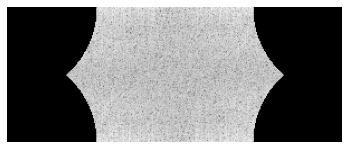

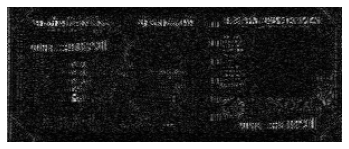

In [66]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


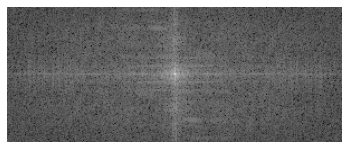

In [67]:
# open the image
f = cv2.imread('impulse.jpg',0)

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


BLPF :

In [68]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 80 # cut of frequency
n = 2 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()


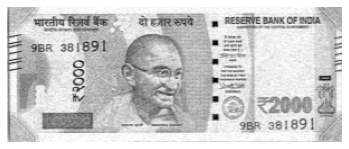

In [69]:
# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

BHPF :

In [70]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 80
n = 2
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)
        
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

In [71]:
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

In [72]:

# open the image f
f = cv2.imread('impulse.jpg',0)

plt.figure(figsize=(5,5))
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

GLPF:

<Figure size 360x360 with 0 Axes>

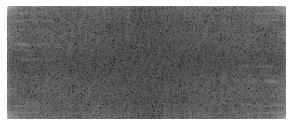

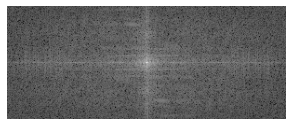

In [73]:
# open the image f
f = cv2.imread('impulse.jpg',0)

plt.figure(figsize=(5,5))

# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

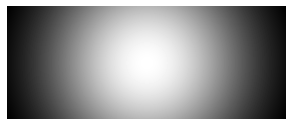

In [74]:

# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 80
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

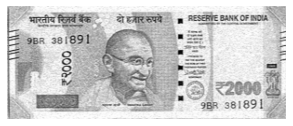

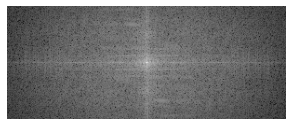

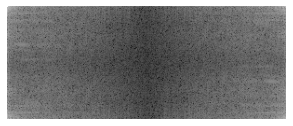

In [75]:

# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

GHPF :

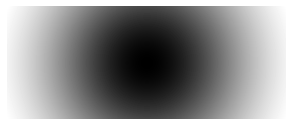

In [76]:

# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

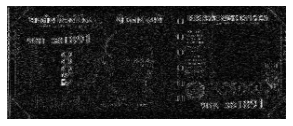

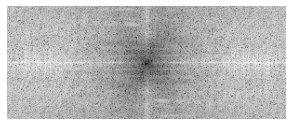

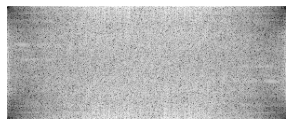

In [77]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

Laplacian Filter (Frequency) :

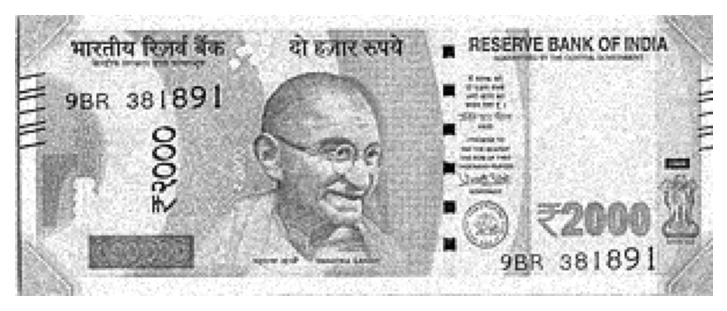

In [78]:
# open and normalized the image
f = cv2.imread('impulse.jpg',0)
f = f / 255

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()


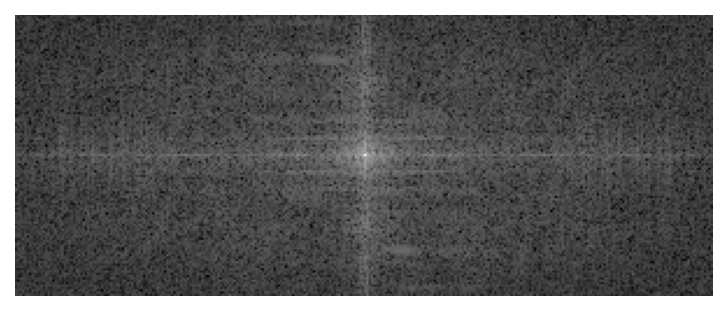

In [79]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

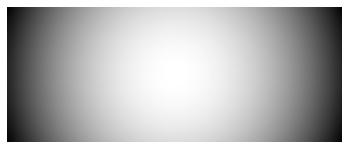

In [80]:
# Laplacian Filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

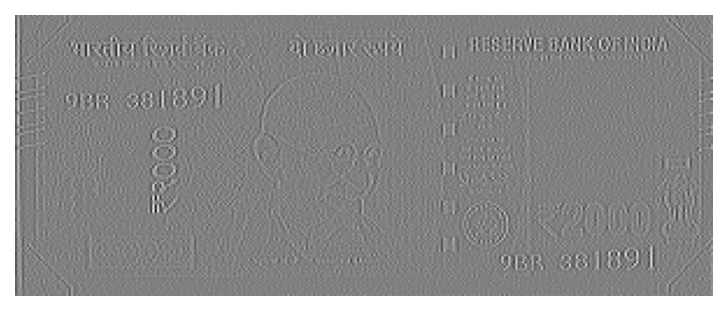

In [81]:
# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

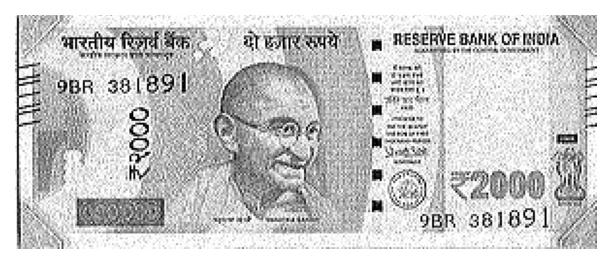

In [82]:
# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

 Unsharp Masking and Highboost Filtering in Frequency Domain :

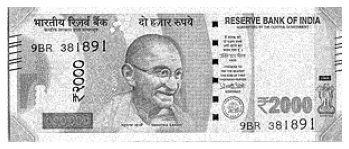

In [83]:
f = cv2.imread('impulse.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

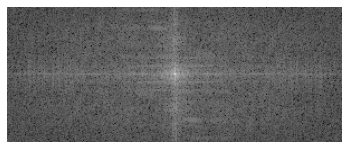

In [84]:
# input image in frequency domain, F(u,v)
F = np.fft.fftshift(np.fft.fft2(f))

plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()


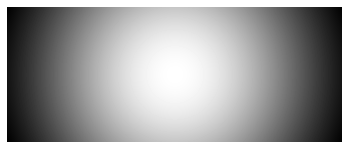

In [85]:
# Gaussian Low Pass Filter
M,N = F.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 100
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

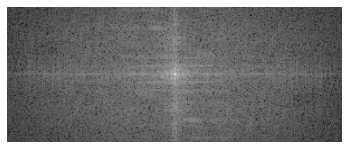

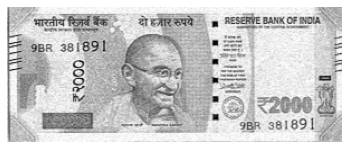

In [86]:
# create fLP(x,y) (smoothed image)
FLP = H * F
plt.imshow(np.log1p(np.abs(FLP)), cmap='gray')
plt.axis('off')
plt.show()
FLP = np.fft.ifftshift(FLP)
fLP = np.abs(np.fft.ifft2(FLP))

plt.imshow(fLP, cmap='gray')
plt.axis('off')
plt.show()

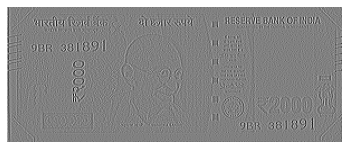

In [87]:
# create mask g(x,y)
gMask = f - fLP

plt.imshow(gMask, cmap='gray')
plt.axis('off')
plt.show()

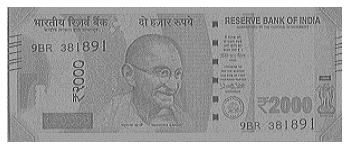

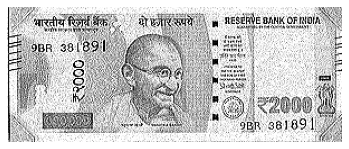

In [88]:
# unsharp masking
k = 5
g = f + k*gMask

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

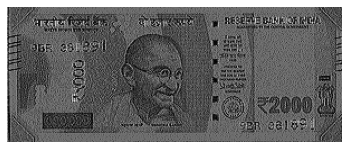

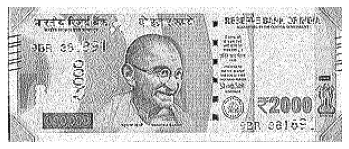

In [89]:
# Unsharp Masking in Frequency Domain
G = (1 + k*(1-H))*F
g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

Spatial Domain Filters :

Mean Filter :

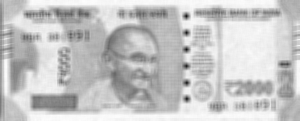

In [90]:
s = cv2.imread('impulse.jpg',0)
## denoise image
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(s, (m,n))
cv2_imshow(denoise_mean)



Median Filter :

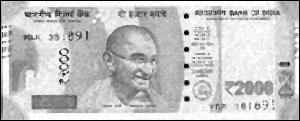

In [91]:
# Read the image
img_noisy1 = cv2.imread('impulse.jpg', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

median = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)
cv2_imshow(img_new1)

Laplacian Filter (Spatial Domain) :

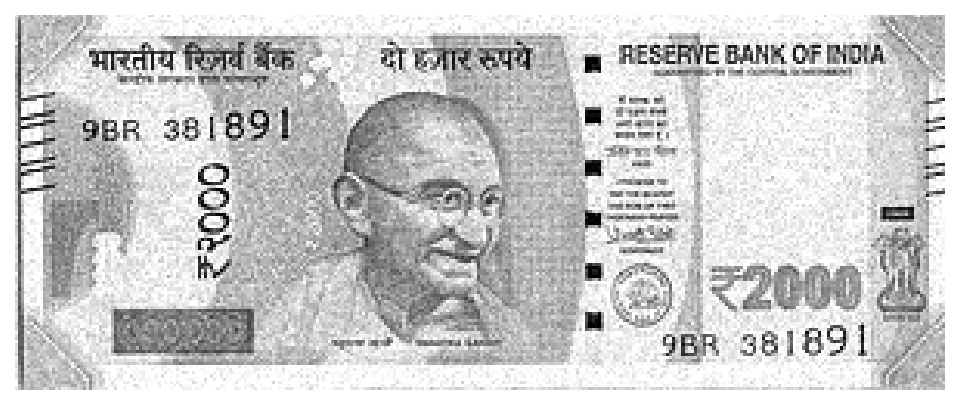

In [92]:
img = cv2.imread('impulse.jpg', 0)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

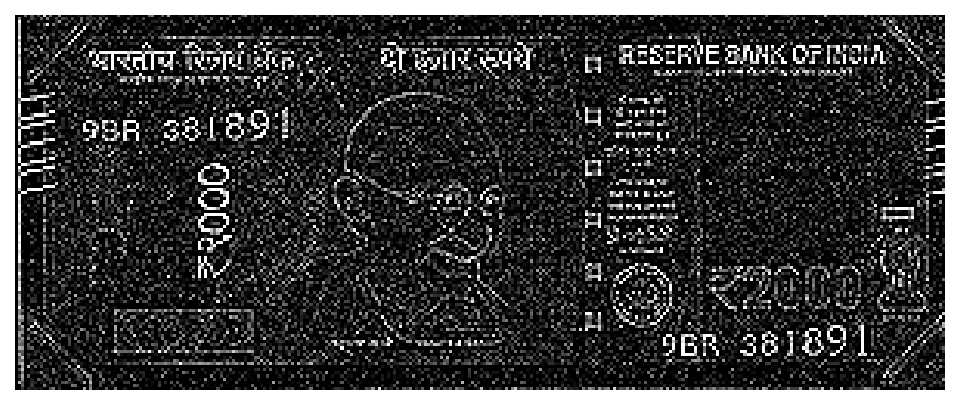

In [93]:
# kernel 1
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

LaplacianImage = cv2.filter2D(src=img, 
                              ddepth=-1, 
                              kernel=kernel)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(LaplacianImage, cmap='gray')
plt.axis('off')
plt.show()

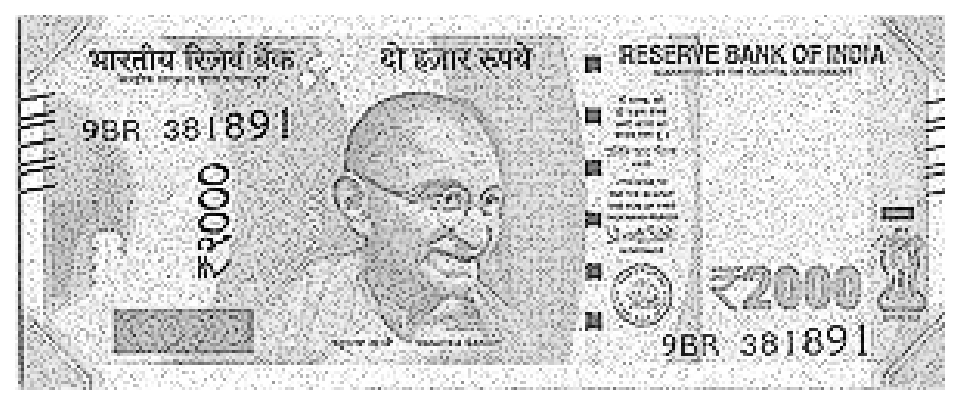

In [94]:
c = -1
g = img + c*LaplacianImage

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

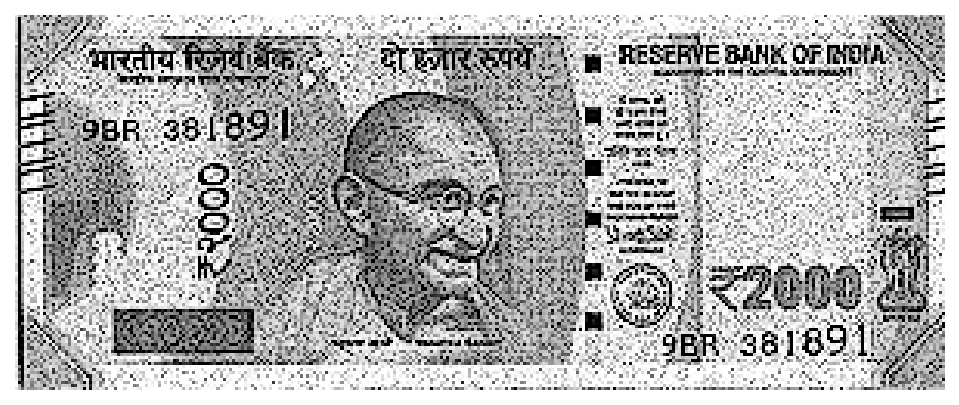

In [95]:
gClip = np.clip(g, 0, 255)
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(gClip, cmap='gray')
plt.axis('off')
plt.show()

Unsharp Masking and High-boost in spatial domain :

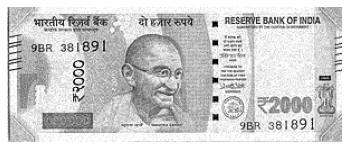

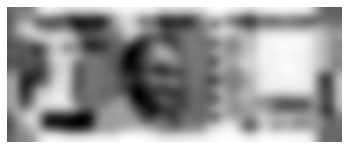

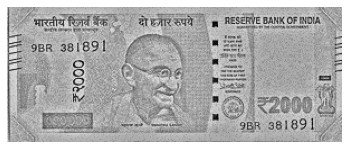

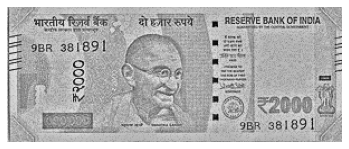

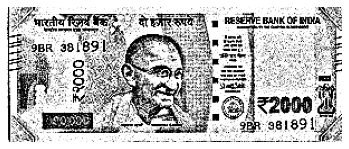

In [96]:
# input image f(x,y)
f = cv2.imread('impulse.jpg', 0)
f = f / 255

plt.imshow(f, cmap='gray'); plt.axis('off'); plt.show()

# blur image
f_blur = cv2.GaussianBlur(src=f, 
                          ksize=(31,31), 
                          sigmaX=0, 
                          sigmaY=0)

plt.imshow(f_blur, cmap='gray'); plt.axis('off'); plt.show()

# mask
g_mask = f - f_blur
plt.imshow(g_mask, cmap='gray'); plt.axis('off'); plt.show()

# unsharp masking
k = 5
g = f + k*g_mask
plt.imshow(g, cmap='gray'); plt.axis('off'); plt.show()

g = np.clip(g, 0, 1)
plt.imshow(g, cmap='gray'); plt.axis('off'); plt.show()

Best Outcome : Median Filter

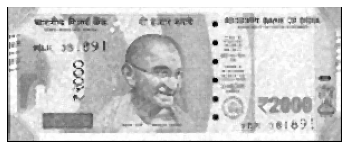

In [97]:
f = cv2.imread('new_median_filtered.png', 0)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()